### Market Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('marketing_campaign_dataset.xlsx')
df.shape

(200005, 15)

In [4]:
#check missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

In [ ]:
def check_dataset(df):
    #Checking for missing values in each column
    missingValues = df.isnull().sum()   
    print("Missing Values:\n", missingValues)


    #check Data Type
    print("Data Types:\n", df.dtypes)


    # Check for duplicate rows
    duplicates = df[df.duplicated()]
    print("Duplicate Rows:\n", duplicates)


    #check for Unexpected Values
    numericColumns = df.select_dtypes(include=[np.number]).columns
    for col in numericColumns:
        inconsistentValues = df[df[col] < 0]
        if not inconsistentValues.empty:
            print(f"Inconsistent Values in {col}:\n", inconsistentValues)


    #Check for unexpected categories in Categorical Columns
    categoricalColumns = df.select_dtypes(include=['object']).columns
    for col in categoricalColumns:
        uniqueValues = df[col].unique()
        print(f"Unique Values in {col}:\n", uniqueValues)


    #Check for inconsistent date formats
    if 'Date' in df.columns:
        try:
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
            print("All dates are in the correct format.")
        except ValueError:
            print("Some dates are not in the correct format.")


    #Ensure clicks are not greater than impressions
    logicalError = df[df['Clicks'] > df['Impressions']]
    if not  logicalError.empty:
        print("Logical Errors (Clicks > Impressions):\n", logicalError)

    #Boxplots for numerical columns
    numericCols = ['Clicks','Impressions','Acquisition_Cost']
    plt.Figure(figsize=(15,8))
    for i, col in enumerate(numericCols, 1):
        plt.subplot(2,2,i)
        sns.boxplot(data=df[col].dropna())
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


    #check to see if conversation rates are withinn a reasonable range
    inconsistentConversions = df[(df['Conversion_Rate'] < 0) | (df['Conversion_Rate'] > 1)]
    if not inconsistentConversions.empty:
        print('Inconsistent conversion rates:\n', inconsistentConversions)

    #general summary statistics for numerical columns
    summary_stats = df[numericCols].describe()

    print('Summary Statistics:\n', summary_stats.round(2))  

    return df
    

Missing Values:
 Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64
Data Types:
 Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost      int64
ROI                 float64
Location             object
Date                 object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
dtype: object
Duplicate Rows:
 Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressi

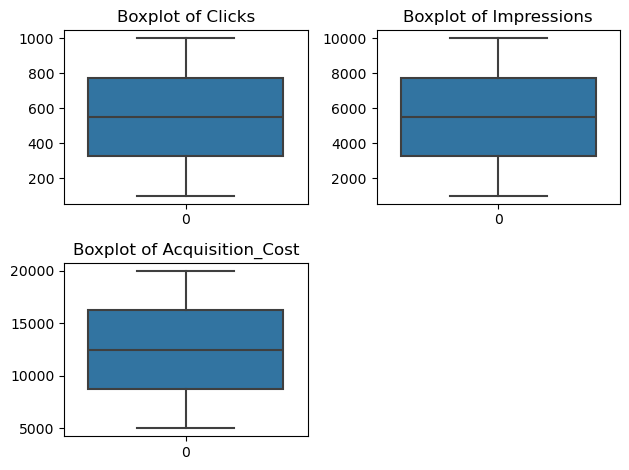

Summary Statistics:
           Clicks  Impressions  Acquisition_Cost
count  200005.00    200005.00         200005.00
mean      549.77      5507.31          12504.44
std       260.02      2596.86           4337.66
min       100.00      1000.00           5000.00
25%       325.00      3266.00           8740.00
50%       550.00      5518.00          12497.00
75%       775.00      7753.00          16264.00
max      1000.00     10000.00          20000.00
        Campaign_ID              Company Campaign_Type Target_Audience  \
0                 1  Innovate Industries         Email       Men 18-24   
1                 2       NexGen Systems         Email     Women 35-44   
2                 3    Alpha Innovations    Influencer       Men 25-34   
3                 4   DataTech Solutions       Display        All Ages   
4                 5       NexGen Systems         Email       Men 25-34   
...             ...                  ...           ...             ...   
200000       200001          

In [6]:
df = check_dataset(df)
print(df)

In [7]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

#Check for inconsistent date formats
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        print("All dates are in the correct format.")
    except ValueError:
        print("Some dates are not in the correct format.")


# Normalize text columns (convert to lowercase and strip spaces)
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].str.lower().str.strip()

All dates are in the correct format.


In [8]:
#Click-Through Rate (CTR) Calculation
df['CTR'] = (df['Clicks']/df['Impressions']) * 100
df[['Campaign_ID', 'CTR']].head()

,Campaign_ID,CTR
0,1,26.326743
1,2,1.541938
2,3,7.586386
3,4,11.923077
4,5,9.021662


In [9]:
#Campaign Performance Analysis (ROI)
df.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)

Campaign_Type
influencer      5.011040
search          5.008357
display         5.006497
email           4.994274
social media    4.991781
Name: ROI, dtype: float64

In [10]:
#Location Based Analysis
df.groupby('Location')['Conversion_Rate'].mean().sort_values(ascending=False)

Location
new york       0.080203
chicago        0.080131
miami          0.080047
los angeles    0.080013
houston        0.079949
Name: Conversion_Rate, dtype: float64

In [14]:
#Basic statistics 
print("\nBasic Statistics:\n", df[['Clicks','Impressions','Acquisition_Cost','ROI']].describe())

#Unique target audiences and marketing channels
unique_audiences = df['Target_Audience'].unique()

#Unique Channels
unique_channels = df['Channel_Used'].unique()


print('\nUnique Audiences:\n',unique_audiences)
print('\nUnique Channels:\n',unique_channels)


Basic Statistics:
               Clicks    Impressions  Acquisition_Cost            ROI
count  200005.000000  200005.000000     200005.000000  200005.000000
mean      549.774591    5507.307107      12504.441794       5.002416
std       260.019354    2596.863794       4337.663210       1.734485
min       100.000000    1000.000000       5000.000000       2.000000
25%       325.000000    3266.000000       8740.000000       3.500000
50%       550.000000    5518.000000      12497.000000       5.010000
75%       775.000000    7753.000000      16264.000000       6.510000
max      1000.000000   10000.000000      20000.000000       8.000000

Unique Audiences:
 ['men 18-24' 'women 35-44' 'men 25-34' 'all ages' 'women 25-34']

Unique Channels:
 ['google ads' 'youtube' 'instagram' 'website' 'facebook' 'email']



Channel Performance:
   Channel_Used        CTR        CPC  Conversion_Rate       ROI
0        email  14.054269  31.881471         0.080282  4.996487
1     facebook  14.049724  32.129366         0.079990  5.018672
2   google ads  13.918943  32.308459         0.080181  5.003126
3    instagram  14.003691  32.080786         0.079886  4.988706
4      website  14.096941  31.779148         0.080182  5.014114
5      youtube  14.119755  31.872904         0.079890  4.993720


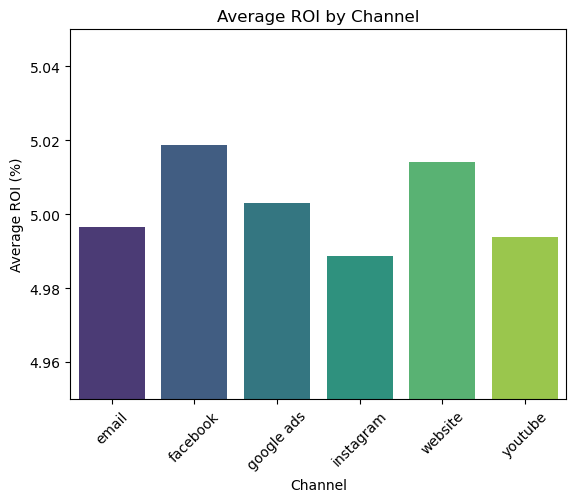

In [48]:
df['CPC'] = df['Acquisition_Cost'] / df['Clicks']  # Cost Per Click


#Comparing campaign performances across different channels
channelPerformance = df.groupby('Channel_Used').agg({
    'CTR': 'mean',
    'CPC': 'mean',
    'Conversion_Rate': 'mean',
    'ROI': 'mean'
}).reset_index()

print("\nChannel Performance:\n", channelPerformance)
plt.ylim(4.95, 5.05)
#Visualize channel performance
plt.Figure(figsize=(12,6))
sns.barplot(data=channelPerformance, x='Channel_Used', y='ROI', palette='viridis')
plt.title('Average ROI by Channel')
plt.ylabel('Average ROI (%)')

plt.xlabel('Channel')
plt.xticks(rotation = 45)

plt.show()

In [40]:
#Identify high-performing  and under performing campaigns based on ROI

highPerforming = df[df['ROI'] > df['ROI'].quantile(0.75)]
underPerforming = df[df['ROI'] < df['ROI'].quantile(0.25)]

print("\nHigh-Performing Campaigns:\n", highPerforming[['Campaign_ID', 'ROI']].sort_values('ROI', ascending=False).head())

print("\nUnderperforming Campaigns:\n", underPerforming[['Campaign_ID', 'ROI']].sort_values('ROI').head())



High-Performing Campaigns:
         Campaign_ID  ROI
132599       132600  8.0
42868         42869  8.0
65236         65237  8.0
98646         98647  8.0
43544         43545  8.0

Underperforming Campaigns:
         Campaign_ID  ROI
117384       117385  2.0
16764         16765  2.0
183298       183299  2.0
138422       138423  2.0
116932       116933  2.0



Location-Based Trends:
       Location        CTR        CPC  Conversion_Rate       ROI
0      chicago  14.045011  32.055853         0.080131  5.001555
1      houston  14.059033  31.829355         0.079949  5.007174
2  los angeles  14.067175  32.078189         0.080013  5.010876
3        miami  14.024957  32.152425         0.080047  5.012282
4     new york  14.006619  31.923819         0.080203  4.980185


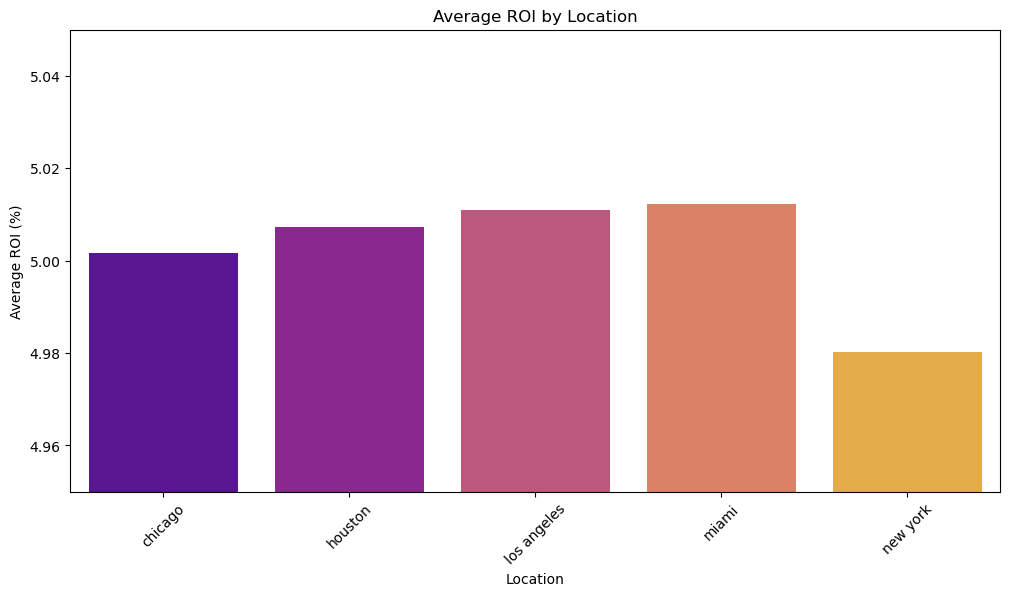

In [52]:
#Exploring location-based trends 

if 'Location' in df.columns:
    locationTrends = df.groupby('Location').agg({
        'CTR': 'mean',
        'CPC': 'mean',
        'Conversion_Rate': 'mean',
        'ROI': 'mean'
    }).reset_index()

    print("\nLocation-Based Trends:\n", locationTrends)

    #Visualize location-based trends 
    plt.figure(figsize=(12,6))
    sns.barplot(data=locationTrends, x='Location', y='ROI', palette='plasma')
    plt.title('Average ROI by Location')
    plt.ylim(4.95, 5.05)
    plt.ylabel('Average ROI (%)')
    plt.xlabel('Location')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'Location' column found in the dataset.")



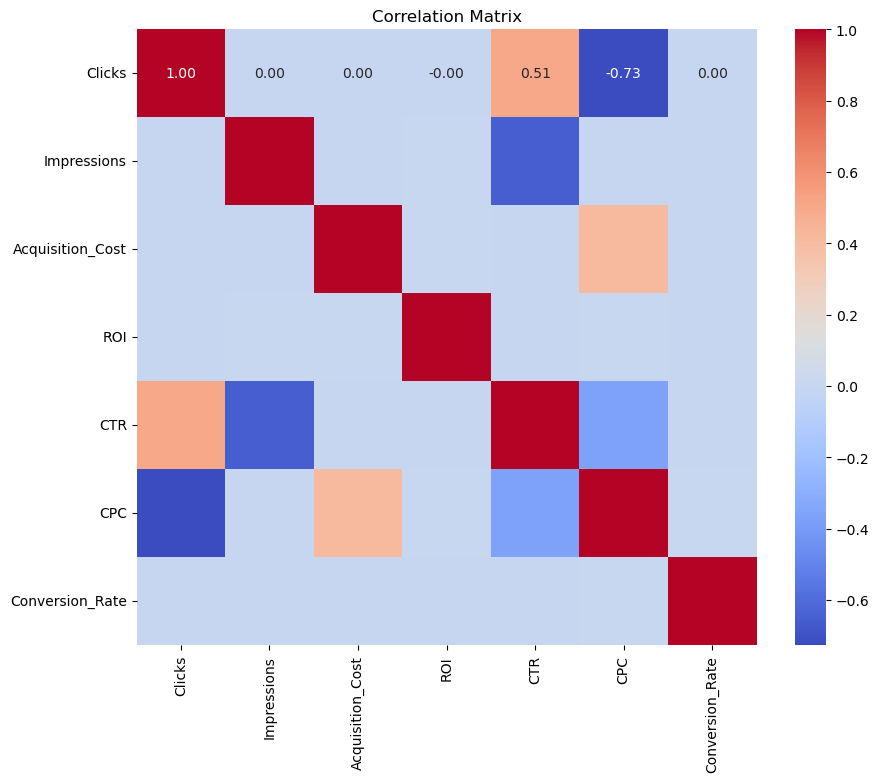

In [43]:
#Correlation between metrics
correlation_matrix = df[['Clicks', 'Impressions', 'Acquisition_Cost', 'ROI', 'CTR', 'CPC', 'Conversion_Rate']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Campaign Type:
   Campaign_Type        CTR        CPC  Conversion_Rate       ROI
0       display  14.126483  31.923411         0.080088  5.006497
1         email  13.948757  32.039734         0.079787  4.994274
2    influencer  14.030083  32.102645         0.080315  5.011040
3        search  13.993587  31.960865         0.080021  5.008357
4  social media  14.103856  32.014830         0.080132  4.991781


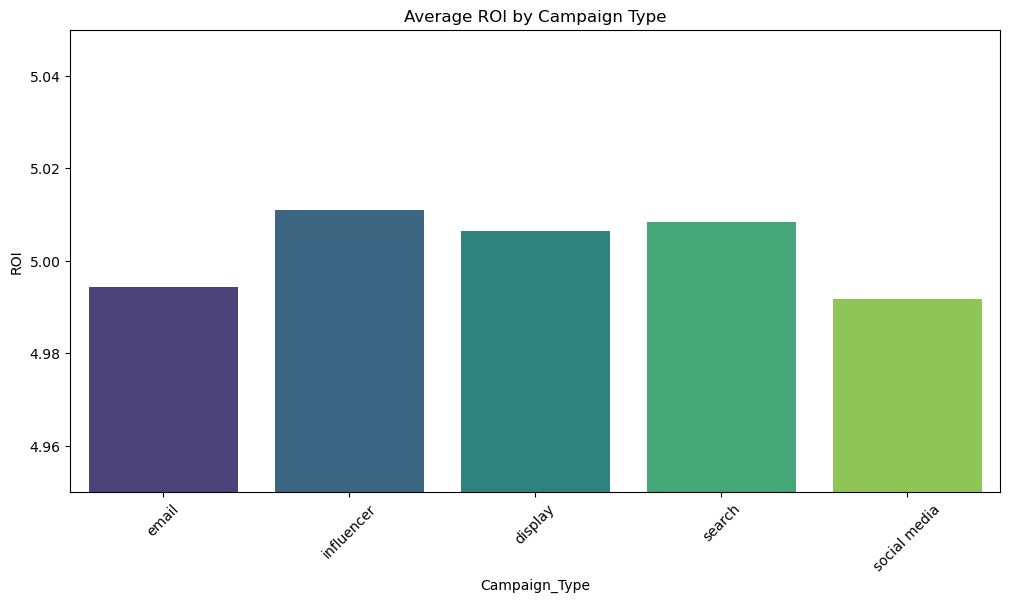

In [63]:
if 'Campaign_Type' in df.columns:
    CampaignType = df.groupby('Campaign_Type').agg({
        'CTR': 'mean',
        'CPC': 'mean',
        'Conversion_Rate': 'mean',
        'ROI': 'mean'
    }).reset_index()

    print("\nCampaign Type:\n", CampaignType)
#Bar Chart - ROI by Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Campaign_Type'], y=df['ROI'], palette='viridis',errorbar=None)
plt.ylim(4.95, 5.05)
plt.xticks(rotation=45)
plt.title('Average ROI by Campaign Type')
plt.show()


Monthly CTR:
          Date        CTR
0  2021-01-31  14.119886
1  2021-02-28  14.157262
2  2021-03-31  13.962083
3  2021-04-30  14.113538
4  2021-05-31  14.034506
5  2021-06-30  13.823107
6  2021-07-31  14.006297
7  2021-08-31  14.009903
8  2021-09-30  13.997507
9  2021-10-31  14.146113
10 2021-11-30  14.073807
11 2021-12-31  14.048376


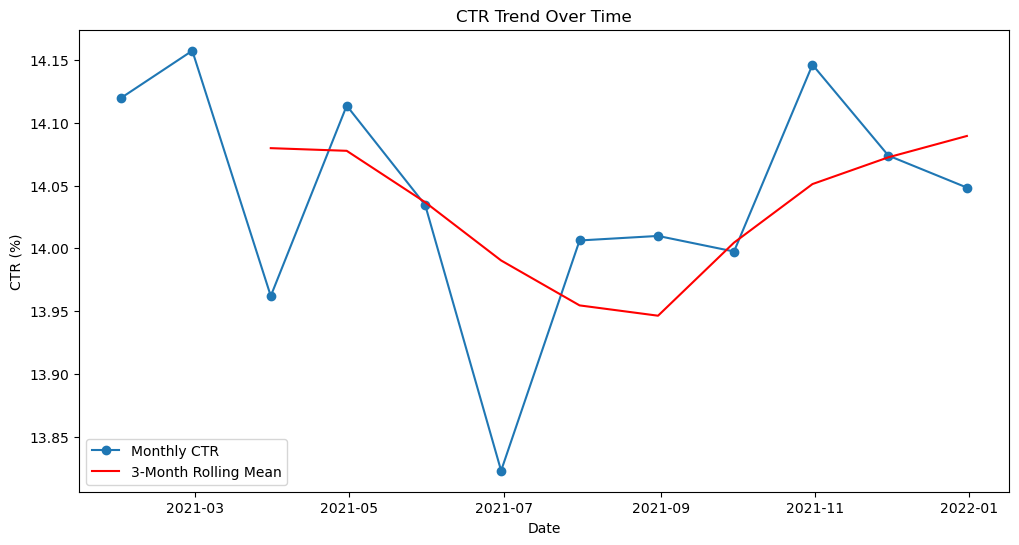

In [ ]:
monthly_ctr = df.groupby(pd.Grouper(key='Date', freq='M'))['CTR'].mean().reset_index()
print("\nMonthly CTR:\n", monthly_ctr)
#Line Graph - CTR Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_ctr['Date'], monthly_ctr['CTR'], marker='o', linestyle='-', label='Monthly CTR')

window_size = 3  
monthly_ctr['Rolling_CTR'] = monthly_ctr['CTR'].rolling(window=window_size).mean()
plt.plot(monthly_ctr['Date'], monthly_ctr['Rolling_CTR'], color='red', label=f'{window_size}-Month Rolling Mean')


plt.title('CTR Trend Over Time')
plt.ylabel('CTR (%)')
plt.xlabel('Date')
plt.legend()
plt.show()


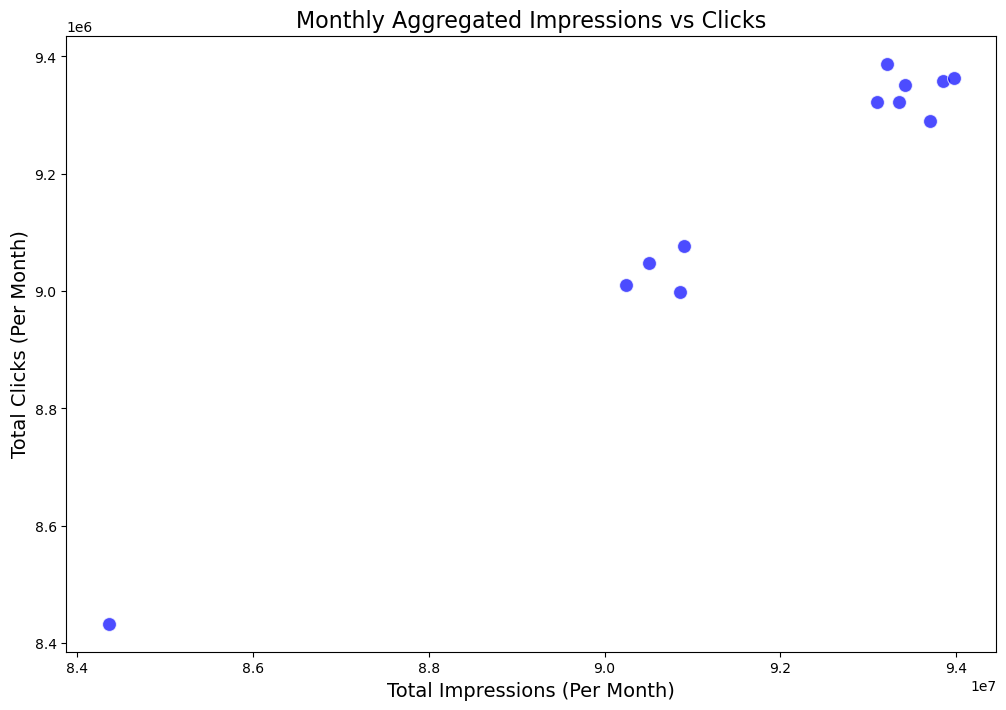

In [80]:
# Scatter Plot - Impressions vs. Clicks
df['Year-Month'] = df['Date'].dt.to_period('M')

df_monthly = df.groupby('Year-Month').agg({
    'Impressions': 'sum', 
    'Clicks': 'sum'
}).reset_index()

df_monthly['Year-Month'] = df_monthly['Year-Month'].astype(str)

# Scatter Plot - Impressions vs Clicks (Aggregated by Month)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_monthly['Impressions'],
    y=df_monthly['Clicks'],
    alpha=0.7,  
    color='b',
    s=100  # Dot size
)

plt.title('Monthly Aggregated Impressions vs Clicks', fontsize=16)
plt.xlabel('Total Impressions (Per Month)', fontsize=14)
plt.ylabel('Total Clicks (Per Month)', fontsize=14)

plt.show()
